# Este é um tutorial sobre o funcionamento da regressão linear, com uma breve explicação sobre os principais conceitos e matemática aplicáveis, e um algorítimo simples para rodar o gradiente descendente, que também será explicado no decorrer do trabalho.
## A regressão linear é basicamente uma técnica para estimar valores de uma variável dependente, normalmente representada pela letra y, tendo por base os valores das variáveis independentes, normalmente representados pela letra x.
#    O modelo de regressão linear, geralmente representado por uma reta, que deve atravessar o gráfico na posição mais próxima possível dos pontos de encontro das variáveis x e y, é utilizada para tentar explicar da melhor maneira possível, de forma linear, a relação entre as referidas variáveis.
##    Para o melhor entendimento é nescessário iniciar pela fórmula da reta, a qual busca através dos valores de x encontrar a variável y, também chamada f(x), sendo que, esta fórmula é a seguinte: f(x) = ax + b, onde a é o valor que multiplicado pela variável x dá a inclinação da reta, e b determina o quanto a mesma estará deslocada verticalmente no gráfico.

# Observação I
### Aprender o funcionamento do gradiente descendente é de suma importância para a ciência de dados, pois, além de ser possível implementar modelos de regressão linear, também é uma das bases para o funcionamento de redes neurais artificiais.

In [89]:
# Importação da bibliotecas que serão utilisadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# Para a implementação do modelo será utilizado o arquivo Consumo_cerveja.csv, utilizado no curso de regressão linar da Alura.
base = pd.read_csv('/content/Consumo_cerveja.csv', sep=';')
base.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


    Como foi visto no curso a variável que mais influencia o cconsumo é a temperatura máxima, portanto, esta será nosa variável x e consumo a y.

In [91]:
X = base['temp_max']
Y = base['consumo']

    Primeiramente será criada uma reta com números escolhidos aleatóriamente por mim, em um modelo com a fórmula da reta, em um loop for, para que a fórmula seja aplicada a cada valor de x.

In [92]:
modelo = []
a = 500
b = 130
for valor in X:
  modelo.append(a * valor + b)
pd.DataFrame(modelo)

,0
0,16380.0
1,16880.0
2,15080.0
3,14430.0
4,14280.0
...,...
360,14230.0
361,13480.0
362,12180.0
363,11330.0


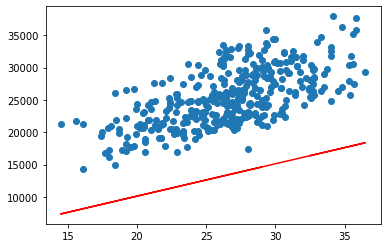

In [93]:
# Gráfico para a visualisação da reta a qual estará claramente deslocada
plt.scatter(X,Y)
plt.plot(X,modelo, color= 'red')
plt.show()

# Agora será aplicado o gradiente descendente o qual consiste no cálculo da derivada da função de custo em relação às variáveis a e b da equação da reta.
###    O cálculo de derivadas não será explicado aqui, mas é facilmente encontrado na internet.
### A fução de custo é a soma de todos os valores do erro calculado entre os pontos da reta e os pontos reais ((ax + b) - y), elevado ao quadrado, sendo que sua derivada em relação ao a é igual a soma de 2 * ((ax + b) - y) * x, e em relação a b igual a soma de 2 * ((ax + b) - y), considerando que a cada loop os valores de x e y variarão, por serem valores do dataframe, enquanto os valores de a e b permanecerão constante se alterando somente em virtude do resultado da iteração.
### Com isso, para que os valores de a e b sejam atualizados, os mesmos deverão ser diminuídos dos resultados de suas respectivas derivadas, as quais são multiplicadas pelo chamado learning rate, aqui representado pela letra A, que dirá quanto o gradiente deverá andar em cada iteração, o que fará com que com as repetidas substituições de valores nas iterações o erro diminua cada vez mais, em consequência, a cada passo a alteração também seja menor, o que dá o nome de gradiente descendente à técnica.

In [94]:
A = 0.000001 # learning rate
a = 500
b = 130
for i in range(1000):
  modelo = a*X + b
  derivada_a = np.sum(2*X*(modelo - Y))
  derivada_b = np.sum(2*(modelo - Y))
  a = a - derivada_a * A
  b = b - derivada_b * A

In [95]:
pd.DataFrame(modelo)

,temp_max
0,30718.058604
1,31654.286512
2,28283.866041
3,27066.769760
4,26785.901388
...,...
360,26692.278597
361,25287.936734
362,22853.744172
363,21262.156727


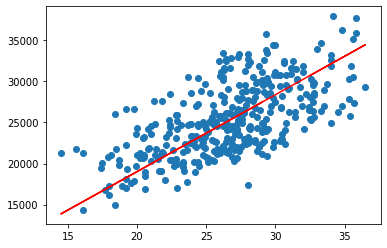

In [96]:
# Rodando novamente o gráfico para conferir as alterações realizadas pelo gradiente descendente
plt.scatter(X,Y)
plt.plot(X,modelo, color= 'red')
plt.show()

#  Observação II 
### Como se pode notar, a linha média, após o ajuste ficou quase totalmente centralizada, podendo ser considerado um bom resultado para o modelo.
### Vale ressaltar que mesmo que haja a possibilidade de o modelo ser melhor ajustado com um número maior de iterações, isso acaba sendo desnecessário, tendo em vista o bom resultado apresentado, e o esforço computacional que seria requerido no caso de mais iterações.
# Observação III
### Outro ponto inportante é a utilização do learning rate, pois, sem ele, os passos dados pela reta em cada iteração seriam exageradamente grandes, dificultando a centralização do modelo.

# Referências

### Vou deixar duas playlists do canal Didática Tech, sobre matemática aplicável ao machine learning, todos os conceitos aplicados foram aprendidos nelas.
    https://www.youtube.com/playlist?list=PLyqOvdQmGdTRR5JfSyyeVO4XG7IkBcw5A

    https://www.youtube.com/playlist?list=PLyqOvdQmGdTTYHKdxWRmt8oOhMwYhmxkM